In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [47]:
df_train = pd.read_csv("C:/Users/esperandio/Desktop/train.csv")
df_test = pd.read_csv("C:/Users/esperandio/Desktop/test.csv")
df_sample = pd.read_csv("C:/Users/esperandio/Desktop/sample_submission.csv")

In [26]:
#ANALISE EXPLORATORIA DE DADOS 1
df_train.head()
df_train.info()

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside  ...          61             0         0           0   
1    AllPub       FR2  ...           0             0         0           0   
2    AllPub    Inside  ...          42             0         0           0   
3    AllPub    Corner  ...          35           272         0           0   
4    AllPub       FR2  ...          84             0         0           0   

  PoolArea MoSold  YrSold  SaleType  SaleCondition

In [27]:
#ANALISE EXPLORATORIA DE DADOS 2
df_test.head()
df_test.info()

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [29]:
#ANALISE EXPLORATORIA DE DADOS 3
df_sample.head()
df_sample.info()

     Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
None


In [32]:
#TIPOS DAS VARIAVEIS EM TRAIN
df_train_types = pd.DataFrame(df_train.dtypes, columns=['Data Types'])
df_train_types.columns.name = 'Variables1'
df_train_types

Variables1,Data Types
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [ ]:
#TIPOS DAS VARIAVEIS EM SAMPLE
df_sample_types = pd.DataFrame(df_sample.dtypes, columns=['Data Types'])
df_sample_types.columns.name = 'Variables3'
df_sample_types

In [ ]:
#TIPOS DAS VARIAVEIS EM TEST
df_test_types = pd.DataFrame(df_test.dtypes, columns=['Data Types'])
df_test_types.columns.name = 'Variables2'
df_test_types

In [50]:
#TRANSFORMANDO VALORES 0 EM NAN
df_train.replace (0, np.nan, inplace = True)
df_test.replace (0, np.nan, inplace = True)
df_sample.replace (0, np.nan, inplace = True)

In [51]:
#EXCLUINDO COLUNAS
df_train_2 = df_train.dropna(axis=1)
df_test_2 = df_test.dropna(axis=1)
df_sample_2 = df_sample.dropna(axis=1)

In [52]:
#EXIBINDO NOVA TABELA TRAIN
df_train_2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GrLivArea,KitchenQual,TotRmsAbvGrd,Functional,PavedDrive,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1710,Gd,8,Typ,Y,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1262,TA,6,Typ,Y,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1786,Gd,6,Typ,Y,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1717,Gd,7,Typ,Y,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,2198,Gd,9,Typ,Y,12,2008,WD,Normal,250000


In [53]:
#EXIBINDO NOVA TABELA TEST
df_test_2.head()

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,TotRmsAbvGrd,PavedDrive,MoSold,YrSold,SaleCondition
0,1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,TA,Y,SBrkr,896,896,5,Y,6,2010,Normal
1,1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,TA,Y,SBrkr,1329,1329,6,Y,6,2010,Normal
2,1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,Gd,Y,SBrkr,928,1629,6,Y,3,2010,Normal
3,1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,Ex,Y,SBrkr,926,1604,7,Y,6,2010,Normal
4,1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,...,Ex,Y,SBrkr,1280,1280,5,Y,1,2010,Normal


In [54]:
#EXIBINDO NOVA TABELA SAMPLE
df_sample_2.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


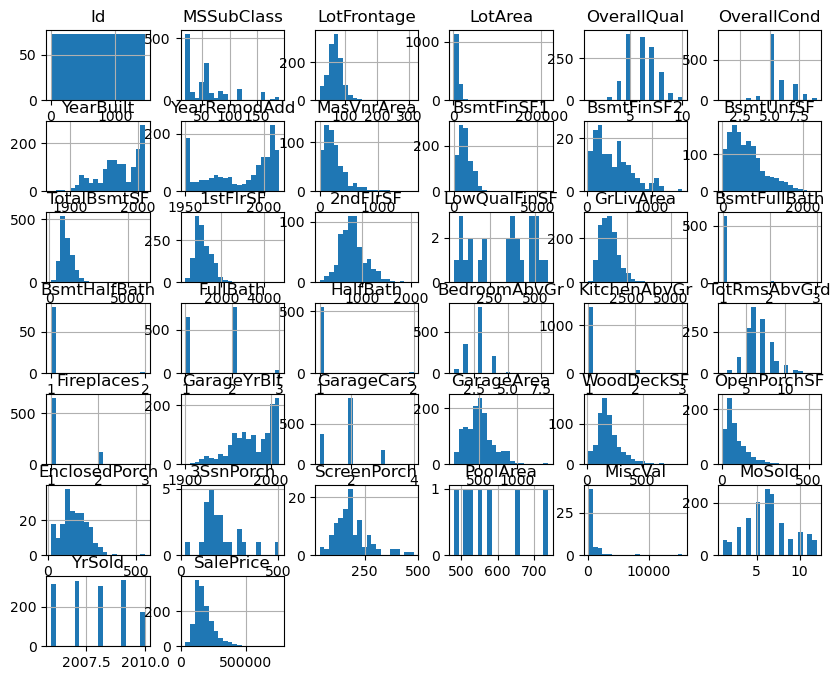

In [56]:
#HISTOGRAMAS TRAIN
numeric_vars = df_train_2.select_dtypes(include=['int64', 'float64'])
numeric_vars.hist(bins=20, figsize=(10, 8))
plt.show()

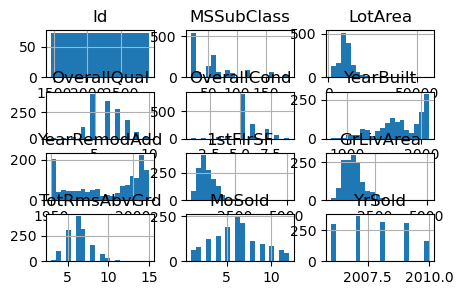

In [57]:
#HISTOGRAMAS TEST
numeric_vars = df_test_2.select_dtypes(include=['int64', 'float64'])
numeric_vars.hist(bins=20, figsize=(5, 3))
plt.show()

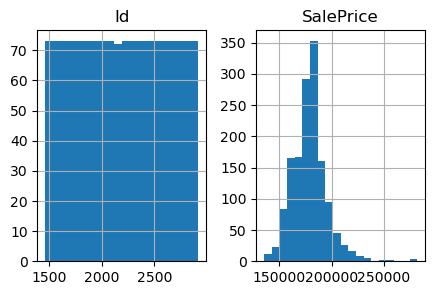

In [27]:
#HISTOGRAMAS SAMPLE
numeric_vars = df_sample_2.select_dtypes(include=['int64', 'float64'])
numeric_vars.hist(bins=20, figsize=(5, 3))
plt.show()

C:\Users\esperandio\AppData\Local\Temp\ipykernel_7212\228661252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlac = df_train.corr()


<Axes: >

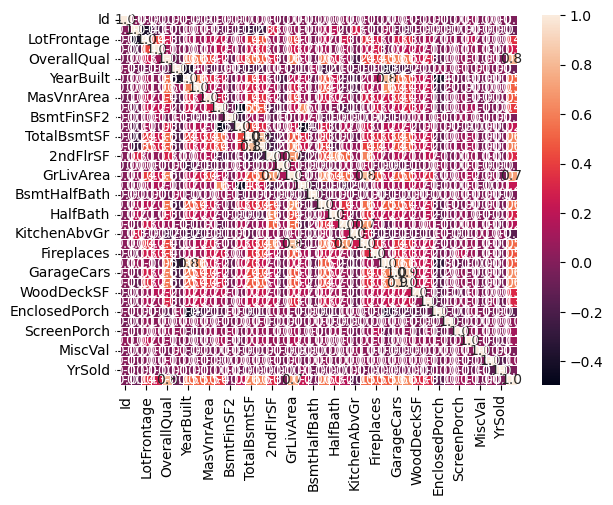

In [34]:
#ANALISE DE CORRELAÇÃO TRAIN
correlac = df_train.corr()
plt_train = sns.heatmap(correlac, annot = True, fmt=".1f", linewidths=.6)
plt_train

C:\Users\esperandio\AppData\Local\Temp\ipykernel_7212\47309357.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlac = df_test.corr()


<Axes: >

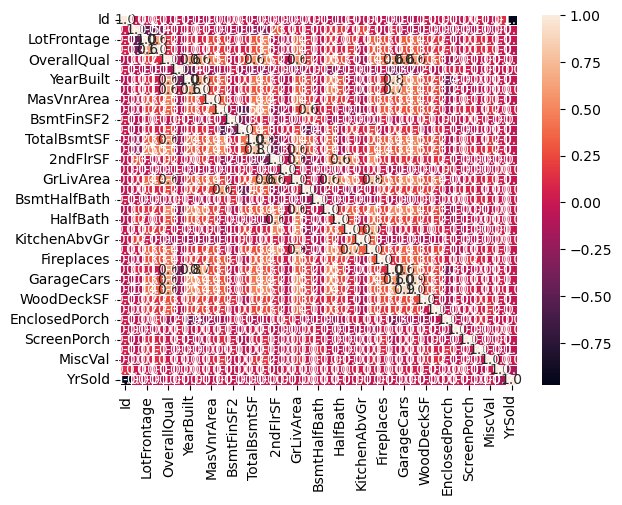

In [35]:
#ANALISE DE CORRELAÇÃO TEST
correlac = df_test.corr()
plt_test = sns.heatmap(correlac, annot = True, fmt=".1f", linewidths=.6)
plt_test

<Axes: >

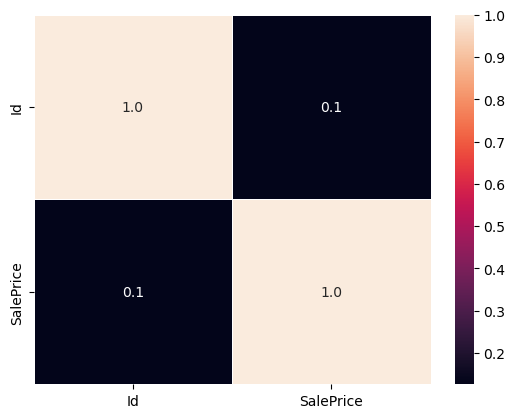

In [33]:
#ANALISE DE CORRELAÇÃO SAMPLE
correlac = df_sample.corr()
plt_sample = sns.heatmap(correlac, annot = True, fmt=".1f", linewidths=.6)
plt_sample

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe_transform = ohe.fit_transform(df_train_2[['LotArea', 'SalePrice']])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside  ...          61             0         0           0   
1    AllPub       FR2  ...           0             0         0           0   
2    AllPub    Inside  ...          42             0         0           0   
3    AllPub    Corner  ...          35           272         0           0   
4    AllPub       FR2  ...          84             0         0           0   

  PoolArea MoSold  YrSold  SaleType  SaleCondition

In [28]:
ohe.get_feature_names()

     Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0  1461          20       RH         80.0    11622   Pave      Reg   
1  1462          20       RL         81.0    14267   Pave      IR1   
2  1463          60       RL         74.0    13830   Pave      IR1   
3  1464          60       RL         78.0     9978   Pave      IR1   
4  1465         120       RL         43.0     5005   Pave      IR1   

  LandContour Utilities LotConfig  ... WoodDeckSF OpenPorchSF EnclosedPorch  \
0         Lvl    AllPub    Inside  ...        140           0             0   
1         Lvl    AllPub    Corner  ...        393          36             0   
2         Lvl    AllPub    Inside  ...        212          34             0   
3         Lvl    AllPub    Inside  ...        360          36             0   
4         HLS    AllPub    Inside  ...          0          82             0   

  3SsnPorch ScreenPorch PoolArea  MoSold  YrSold  SaleType  SaleCondition  
0         0         120     

In [30]:
ohe_transform.toarray()

       SalePrice
0  169277.052498
1  187758.393989
2  183583.683570
3  179317.477511
4  150730.079977


In [ ]:
df_ohe = pd.DataFrame(ohe_transform.toarray())
df_ohe.columns = ohe.get_feature_names()
df_ohe.head()

In [ ]:
df_train_2 = pd.concat([df_train_2, df_ohe], axis = 1)
df_train_2.head()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     315.1
Date:                Wed, 21 Jun 2023   Prob (F-statistic):           3.15e-07
Time:                        21:18:01   Log-Likelihood:                -86.389
No. Observations:                  13   AIC:                             186.8
Df Residuals:                       6   BIC:                             190.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.714e+06   1.35e+06     -3.484      0.0

C:\Users\esperandio\AppData\Local\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


ImportError: cannot import name 'StandarScaler' from 'sklearn.preprocessing' (C:\Users\esperandio\AppData\Local\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

NameError: name 'StandarScaler' is not defined